In [1]:
from utils import ModelImporter, Preprocessing
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pre = Preprocessing('fer2013')
train = pre.load_data(filename='DatasetAAA.csv', name='train')
train_no_happy = train.loc[train['emotion'] != 3]

In [3]:
from image_utils import ImageConverter
import matplotlib.pyplot as plt

In [4]:
img_conv = ImageConverter()

In [5]:
train_no_happy_np = train_no_happy.drop(columns = ['emotion']).values

In [6]:
array_0 = train_no_happy_np[0]
array_0_frame = img_conv.reshape_array_to_frame(array_0)
array_0_frame_flipped = img_conv.rotate_image(array_0_frame, 20)

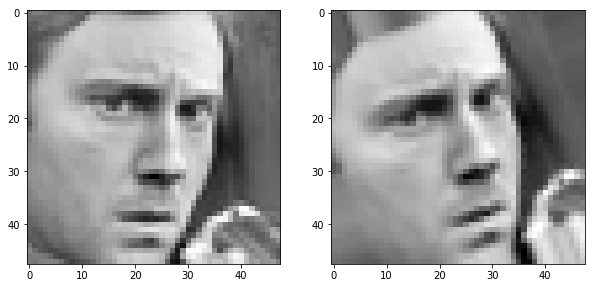

In [7]:
plt.figure(1, figsize=(10, 5))
plt.subplot(1,2, 1)
plt.imshow(array_0_frame, cmap='gray', interpolation='none')
plt.subplot(1,2, 2)
plt.imshow(array_0_frame_flipped, cmap='gray', interpolation='none')
plt.show()

In [8]:
array_50 = train_no_happy_np[50]
array_50_frame = img_conv.reshape_array_to_frame(array_50)
array_50_frame_flipped = img_conv.rotate_image(array_50_frame, 20)

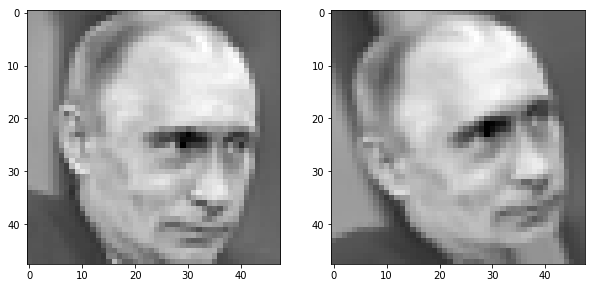

In [9]:
plt.figure(1, figsize=(10, 5))
plt.subplot(1,2, 1)
plt.imshow(array_50_frame, cmap='gray', interpolation='none')
plt.subplot(1,2, 2)
plt.imshow(array_50_frame_flipped, cmap='gray', interpolation='none')
plt.show()

In [10]:
rotated_10_train = np.zeros(shape=train_no_happy_np.shape)
rotated_20_train = np.zeros(shape=train_no_happy_np.shape)
idx = 0
for i in range(len(train_no_happy_np)):
    array = train_no_happy_np[i]
    frame = img_conv.reshape_array_to_frame(array)
    
    rot_10 = img_conv.rotate_image(frame, 10)
    array_rot_10 = img_conv.reshape_frame_to_array(rot_10)
    rotated_10_train[i] = array_rot_10  
    
    rot_20 = img_conv.rotate_image(frame, 20)
    array_rot_20 = img_conv.reshape_frame_to_array(rot_20)
    rotated_20_train[i] = array_rot_20
    
    ##rot_15 = img_conv.rotate_image(img_conv.reshape_array_to_frame(train_only_disgust_np[i]), 15)
    #rotated_train_only_disgust[i] = img_conv.reshape_frame_to_array(rot_5)
    #rotated_train_only_disgust[idx + 1] = img_conv.reshape_frame_to_array(rot_15)

In [11]:
len(rotated_10_train)

21494

In [12]:
len(rotated_20_train)

21494

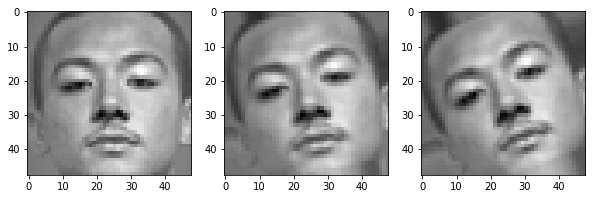

In [37]:
img_idx = 170
plt.figure(1, figsize=(10, 5))
plt.subplot(1,3, 1)
plt.imshow(img_conv.reshape_array_to_frame(train_no_happy_np[img_idx]), cmap='gray', interpolation='none')
plt.subplot(1,3, 2)
plt.imshow(img_conv.reshape_array_to_frame(rotated_10_train[img_idx]), cmap='gray', interpolation='none')
plt.subplot(1,3, 3)
plt.imshow(img_conv.reshape_array_to_frame(rotated_20_train[img_idx]), cmap='gray', interpolation='none')
plt.show()

In [38]:
#Seems to work, going to save the data

In [39]:
rot_10_df = pd.DataFrame(rotated_10_train)
rot_10_df['emotion'] = train_no_happy['emotion']
rot_10_df.tail()

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,emotion
21489,-0.311786,-0.302014,-0.299970,-0.301352,-0.311000,-0.338769,-0.366169,-0.402860,-0.457045,-0.478005,...,-1.225396,-1.109569,-1.108838,-1.095667,-1.072325,-1.048714,-1.019302,-0.973128,-1.039008,4.0
21490,0.031713,0.055329,0.078267,0.098364,0.092666,0.057668,0.048389,0.131278,0.415199,0.499331,...,-0.657981,-0.546934,-0.460450,-0.409936,-0.289086,-0.115913,0.063498,0.287032,0.422810,4.0
21491,-0.150398,-0.111281,-0.148959,-0.125260,0.041643,0.191852,0.258726,0.346129,0.465729,0.564515,...,1.480848,1.445017,1.417238,1.427785,1.448986,1.421357,1.366399,1.260799,1.147682,2.0
21492,-0.275156,-0.270363,-0.353488,-0.321488,-0.234503,-0.258644,-0.080052,0.150036,0.320307,0.452403,...,0.393377,0.402236,0.367158,0.358720,0.389502,0.419522,0.456364,0.405701,0.362191,4.0
21493,1.261885,1.310564,1.386685,1.431687,1.443478,1.467720,1.471558,1.454109,1.451289,1.448985,...,0.753739,0.373972,0.181626,0.073213,-0.142344,-0.449943,-0.855736,-1.240961,-1.386869,6.0


In [40]:
rot_20_df = pd.DataFrame(rotated_20_train)
rot_20_df['emotion'] = train_no_happy['emotion']
rot_20_df.tail()

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,emotion
21489,-0.341639,-0.367672,-0.402860,-0.455620,-0.481121,-0.459035,-0.479520,-0.464260,-0.152991,0.125837,...,-0.339615,-0.318873,-0.212553,-0.887497,-1.294585,-1.218687,-1.109569,-1.106477,-1.099591,4.0
21490,0.056600,0.047997,0.131278,0.403418,0.551849,0.028399,-0.457052,-0.678430,-0.907647,-0.304434,...,-0.883431,-0.840580,-0.869649,-0.873374,-0.758057,-0.654901,-0.546934,-0.464683,-0.414020,4.0
21491,0.199102,0.262096,0.346129,0.463698,0.548283,0.701333,0.799756,0.821228,0.768179,0.445026,...,1.378883,1.469630,1.447008,1.432262,1.467542,1.480975,1.445017,1.418033,1.425547,2.0
21492,-0.245087,-0.064012,0.150036,0.315054,0.447443,0.492375,0.514116,0.537820,0.583096,0.579373,...,0.256228,0.330554,0.254001,0.266591,0.347009,0.394510,0.402236,0.370376,0.357331,4.0
21493,1.469582,1.469998,1.454109,1.451366,1.449163,1.430598,1.338139,1.336205,1.341936,1.311006,...,0.997470,1.031937,0.985814,0.976423,0.958778,0.744633,0.373972,0.185542,0.086244,6.0


In [41]:
rot_df = pd.concat([rot_10_df, rot_20_df])

In [42]:
rot_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42988 entries, 0 to 21493
Columns: 2305 entries, 0 to emotion
dtypes: float64(2305)
memory usage: 756.3 MB


In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28709 entries, 0 to 28708
Columns: 2305 entries, 0 to emotion
dtypes: float64(2304), int64(1)
memory usage: 504.9 MB


In [44]:
#the rotated dataset and the train seems to match

In [45]:
rot_df.columns = train.columns 

In [46]:
train_expanded_rot = pd.concat([train, rot_df], axis = 0)

In [47]:
train_expanded_rot = train_expanded_rot.reset_index().drop(columns = ['index'])

In [48]:
train_expanded_rot.tail()

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,emotion
71692,-0.341639,-0.367672,-0.402860,-0.455620,-0.481121,-0.459035,-0.479520,-0.464260,-0.152991,0.125837,...,-0.339615,-0.318873,-0.212553,-0.887497,-1.294585,-1.218687,-1.109569,-1.106477,-1.099591,4.0
71693,0.056600,0.047997,0.131278,0.403418,0.551849,0.028399,-0.457052,-0.678430,-0.907647,-0.304434,...,-0.883431,-0.840580,-0.869649,-0.873374,-0.758057,-0.654901,-0.546934,-0.464683,-0.414020,4.0
71694,0.199102,0.262096,0.346129,0.463698,0.548283,0.701333,0.799756,0.821228,0.768179,0.445026,...,1.378883,1.469630,1.447008,1.432262,1.467542,1.480975,1.445017,1.418033,1.425547,2.0
71695,-0.245087,-0.064012,0.150036,0.315054,0.447443,0.492375,0.514116,0.537820,0.583096,0.579373,...,0.256228,0.330554,0.254001,0.266591,0.347009,0.394510,0.402236,0.370376,0.357331,4.0
71696,1.469582,1.469998,1.454109,1.451366,1.449163,1.430598,1.338139,1.336205,1.341936,1.311006,...,0.997470,1.031937,0.985814,0.976423,0.958778,0.744633,0.373972,0.185542,0.086244,6.0


In [49]:
# I have now the data with rotated images, my next step is to flip ALL OF IT

In [50]:
train_expanded_np = train_expanded_rot.drop(columns = ['emotion']).values

In [51]:
flipped_train_np = np.zeros(shape=train_expanded_np.shape)
for i in range(len(train_expanded_np)):
    flipped_np = img_conv.flip_frame_horitzontally(img_conv.reshape_array_to_frame(train_expanded_np[i]))
    flipped_train_np[i] = img_conv.reshape_frame_to_array(flipped_np)

In [52]:
flipped_train_np

array([[-0.94871455, -0.90103049, -0.76584152, ..., -0.39951593,
        -0.56421664, -0.51135155],
       [ 0.01435704,  0.29842735,  0.20136557, ...,  0.88745717,
         0.8548128 ,  0.86072528],
       [-1.25348404, -1.0988792 , -0.86633057, ...,  1.71570718,
         1.70369649,  1.66634838],
       ...,
       [ 1.09337205,  1.13499484,  1.1422535 , ..., -0.21354321,
        -0.20646465, -0.20761608],
       [ 0.26605158,  0.12850784,  0.14682207, ...,  1.15325445,
         1.15736663,  1.14809169],
       [ 1.13304254,  1.11750691,  1.10125015, ...,  0.88992646,
         0.90028195,  0.90816956]])

In [53]:
new_train = pd.DataFrame(flipped_train_np)
new_train['emotion'] = train_expanded_rot['emotion']
new_train.tail()

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,emotion
71692,-0.284512,-0.289621,-0.292104,-0.293087,-0.294071,-0.295247,-0.296496,-0.297744,-0.273645,-0.255837,...,-0.070757,-0.232289,-0.267419,-0.302549,-0.328411,-0.329560,-0.330708,-0.333444,-0.338957,4.0
71693,-0.771622,-0.793740,-0.815685,-0.837531,-0.859378,-0.852912,-0.835830,-0.818747,-0.726894,-0.707111,...,-0.658022,-0.738029,-0.725659,-0.713289,-0.703429,-0.700262,-0.697095,-0.698702,-0.708665,4.0
71694,1.093372,1.134995,1.142254,1.129876,1.117498,1.111473,1.107830,1.104187,1.114308,1.128831,...,-0.082327,-0.273849,-0.261555,-0.249260,-0.237106,-0.225325,-0.213543,-0.206465,-0.207616,2.0
71695,0.266052,0.128508,0.146822,0.254198,0.361574,0.411199,0.439167,0.467135,0.536793,0.634655,...,0.541106,0.564324,0.770464,0.976603,1.129731,1.141492,1.153254,1.157367,1.148092,4.0
71696,1.133043,1.117507,1.101250,1.084581,1.067912,1.054467,1.042230,1.029993,1.153907,1.381517,...,0.967424,0.747814,0.790117,0.832420,0.866395,0.878161,0.889926,0.900282,0.908170,6.0


In [54]:
new_train.columns = train_expanded_rot.columns 

In [55]:
train_expanded = pd.concat([train_expanded_rot, new_train], axis = 0)

In [56]:
train_expanded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143394 entries, 0 to 71696
Columns: 2305 entries, 0 to emotion
dtypes: float64(2305)
memory usage: 2.5 GB


In [57]:
pre.set(name='DatasetEEE', value=train_expanded)

In [34]:
#Check the structure of the new training dataset

In [58]:
X_df = train_expanded.drop(columns=['emotion'])
y_df = train_expanded['emotion']

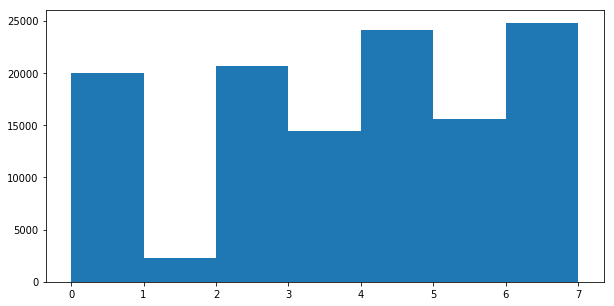

In [59]:
plt.figure(1, figsize=(10, 5))
plt.hist(y_df.values, bins = [0, 1, 2, 3, 4, 5, 6, 7])
plt.show()

In [61]:
pre.save(name= 'DatasetEEE')

In [62]:
print('DatasetEEE saved')

DatasetEEE saved


In [16]:
#compare the new with the old one

In [46]:
pre.load_data(filename='train_norm.csv', name='train_norm')

X_df_old = pre.get(name='train_norm').drop(columns=['emotion'])
y_df_old= pre.get(name='train_norm')['emotion']

In [49]:
pre.load_data(filename='train_expanded_disgust.csv', name='train_expanded_disgust')

X_df_exp_c1 = pre.get(name='train_expanded_disgust').drop(columns=['emotion'])
y_df_exp_c1 = pre.get(name='train_expanded_disgust')['emotion']

In [48]:
pre.load_data(filename='train_expanded.csv', name='train_expanded')

X_df_exp = pre.get(name='train_expanded').drop(columns=['emotion'])
y_df_exp = pre.get(name='train_expanded')['emotion']

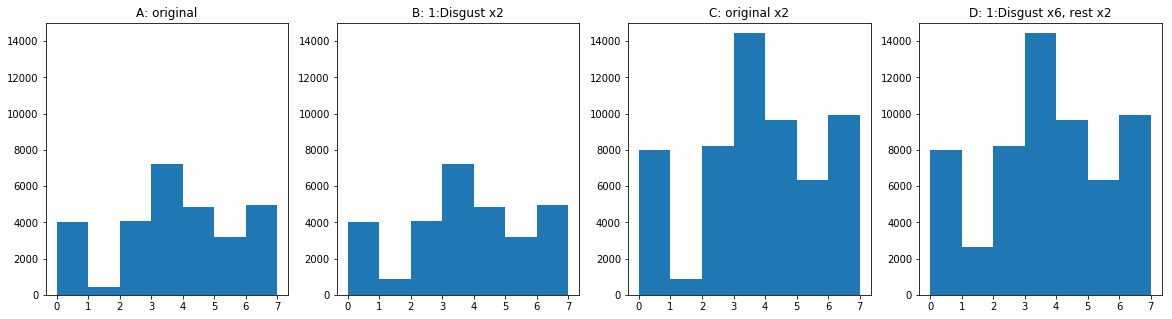

In [69]:
plt.figure(1, figsize=(20, 5))
plt.subplot(1,4, 1)
plt.hist(y_df_old.values, bins = [0, 1, 2, 3, 4, 5, 6, 7])
plt.ylim([0,15000])
plt.title('A: original')
plt.subplot(1,4, 2)
plt.hist(y_df_exp_c1.values, bins = [0, 1, 2, 3, 4, 5, 6, 7])
plt.ylim([0,15000])
plt.title('B: 1:Disgust x2')
plt.subplot(1,4, 3)
plt.hist(y_df_exp.values, bins = [0, 1, 2, 3, 4, 5, 6, 7])
plt.ylim([0,15000])
plt.title('C: original x2')
plt.subplot(1,4, 4)
plt.hist(y_df.values, bins = [0, 1, 2, 3, 4, 5, 6, 7])
plt.ylim([0,15000])
plt.title('D: 1:Disgust x6, rest x2')
plt.show()